In [6]:
# https://towardsdatascience.com/fifa-world-cup-2022-a-data-driven-approach-to-ideal-team-line-ups-f4c555dcd7a3

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')

df = pd.read_csv('players_22.csv', low_memory=False)

In [4]:
# selecting only one position
df['player_positions'] = df['player_positions'].str.split(',', expand=True)[0]

# dropping nan
df.dropna(inplace=True)

In [7]:
df

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19234,261962,https://sofifa.com/player/261962/defu-song/220002,Song Defu,宋德福,CDM,47,52,70000.0,1000.0,22,...,46+2,46+2,46+2,48+2,15+2,https://cdn.sofifa.net/players/261/962/22_120.png,https://cdn.sofifa.net/teams/112541/60.png,https://cdn.sofifa.net/flags/cn.png,NaN,https://cdn.sofifa.net/flags/cn.png
19235,262040,https://sofifa.com/player/262040/caoimhin-port...,C. Porter,Caoimhin Porter,CM,47,59,110000.0,500.0,19,...,44+2,44+2,44+2,48+2,14+2,https://cdn.sofifa.net/players/262/040/22_120.png,https://cdn.sofifa.net/teams/445/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png
19236,262760,https://sofifa.com/player/262760/nathan-logue/...,N. Logue,Nathan Logue-Cunningham,CM,47,55,100000.0,500.0,21,...,45+2,45+2,45+2,47+2,12+2,https://cdn.sofifa.net/players/262/760/22_120.png,https://cdn.sofifa.net/teams/111131/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png
19237,262820,https://sofifa.com/player/262820/luke-rudden/2...,L. Rudden,Luke Rudden,ST,47,60,110000.0,500.0,19,...,26+2,26+2,26+2,32+2,15+2,https://cdn.sofifa.net/players/262/820/22_120.png,https://cdn.sofifa.net/teams/111131/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png


In [8]:
# dropping injured players
players_missing_worldcup = ['K. Benzema', 'S. Mané', 'S. Agüero', 'Sergio Ramos', 'P. Pogba',
                            'M. Reus', 'Diogo Jota', 'A. Harit', 'N. Kanté', 'G. Lo Celso', 'Piqué']

drop_index = df[df['short_name'].isin(players_missing_worldcup)].index
df.drop(drop_index, axis=0, inplace=True)

# filtering only national teams in the world cup
teams_worldcup = [
    'Qatar', 'Brazil', 'Belgium', 'France', 'Argentina', 'England', 'Spain', 'Portugal',
    'Mexico', 'Netherlands', 'Denmark', 'Germany', 'Uruguay', 'Switzerland', 'United States', 'Croatia',
    'Senegal', 'Iran', 'Japan', 'Morocco', 'Serbia', 'Poland', 'South Korea', 'Tunisia',
    'Cameroon', 'Canada', 'Ecuador', 'Saudi Arabia', 'Ghana', 'Wales', 'Costa Rica', 'Australia'
]

df = df[df['nationality_name'].isin(teams_worldcup)]

In [9]:
df.sort_values(by=['overall', 'potential', 'value_eur'], ascending=False, inplace=True)

C:\Users\Prayag Chawla\AppData\Local\Temp\ipykernel_28280\2532729969.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_values(by=['overall', 'potential', 'value_eur'], ascending=False, inplace=True)


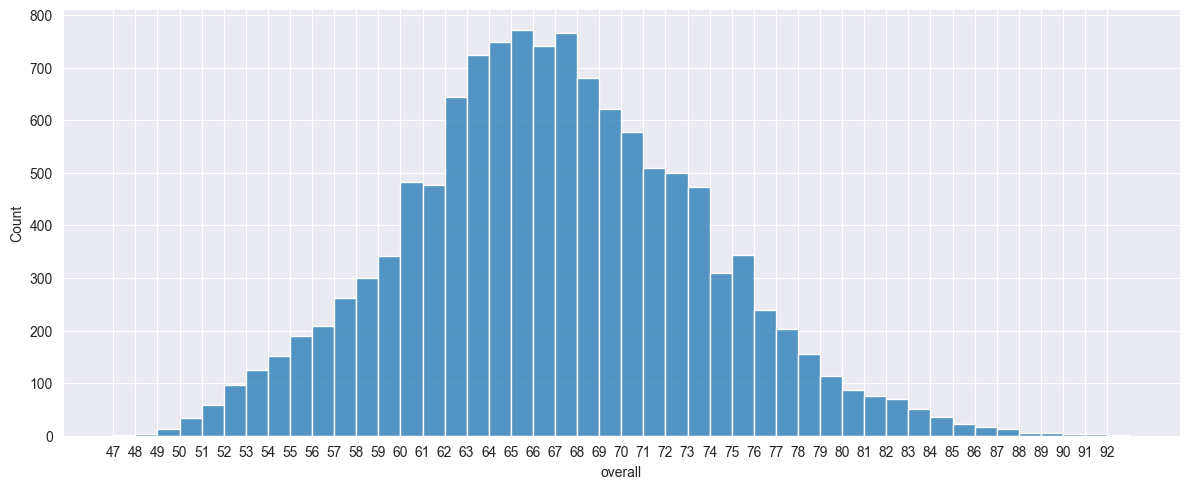

In [10]:
import numpy as np
fig, ax = plt.subplots(figsize=(12, 5), tight_layout=True)

sns.histplot(df, x='overall', binwidth=1)

bins = np.arange(df['overall'].min(), df['overall'].max(), 1)
plt.xticks(bins)
plt.show()

In [11]:
df.drop_duplicates('player_positions')

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
6,231747,https://sofifa.com/player/231747/kylian-mbappe...,K. Mbappé,Kylian Mbappé Lottin,"ST, LW",91,95,194000000.0,230000.0,22,...,54+3,54+3,54+3,63+3,18+3,https://cdn.sofifa.net/players/231/747/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1335/60.png,https://cdn.sofifa.net/flags/fr.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17748,263392,https://sofifa.com/player/263392/wiktor-klos/2...,W. Kłos,Wiktor Kłos,"LM, RM, LWB",56,65,325000.0,550.0,21,...,49+2,49+2,49+2,53+2,14+2,https://cdn.sofifa.net/players/263/392/22_120.png,https://cdn.sofifa.net/teams/114004/60.png,https://cdn.sofifa.net/flags/pl.png,NaN,https://cdn.sofifa.net/flags/pl.png
17830,243166,https://sofifa.com/player/243166/ben-paton/220002,B. Paton,Ben Paton,"CM, LW, LB",55,68,300000.0,900.0,21,...,53+2,53+2,53+2,55+2,15+2,https://cdn.sofifa.net/players/243/166/22_120.png,https://cdn.sofifa.net/teams/631/60.png,https://cdn.sofifa.net/flags/gb-sct.png,NaN,https://cdn.sofifa.net/flags/ca.png
17956,257490,https://sofifa.com/player/257490/lucas-mauragi...,L. Mauragis,Lucas Mauragis,"LW, LWB, RB",55,68,300000.0,500.0,19,...,50+2,50+2,50+2,53+2,13+2,https://cdn.sofifa.net/players/257/490/22_120.png,https://cdn.sofifa.net/teams/111398/60.png,https://cdn.sofifa.net/flags/au.png,NaN,https://cdn.sofifa.net/flags/au.png
18254,257221,https://sofifa.com/player/257221/jannick-libur...,J. Liburd,Jannick Jørgensen Liburd,"RM, LWB",54,66,250000.0,1000.0,19,...,39+2,39+2,39+2,43+2,15+2,https://cdn.sofifa.net/players/257/221/22_120.png,https://cdn.sofifa.net/teams/1447/60.png,https://cdn.sofifa.net/flags/dk.png,NaN,https://cdn.sofifa.net/flags/dk.png


In [12]:
df_best_players = df.copy()
df_best_players = df_best_players.drop_duplicates('nationality_name').reset_index(drop=True)
country_short =  df_best_players['nationality_name'].str.extract('(^\w{3})', expand=False).str.upper()
df_best_players['name_nationality'] = df_best_players['short_name'] +' (' + country_short + ')'

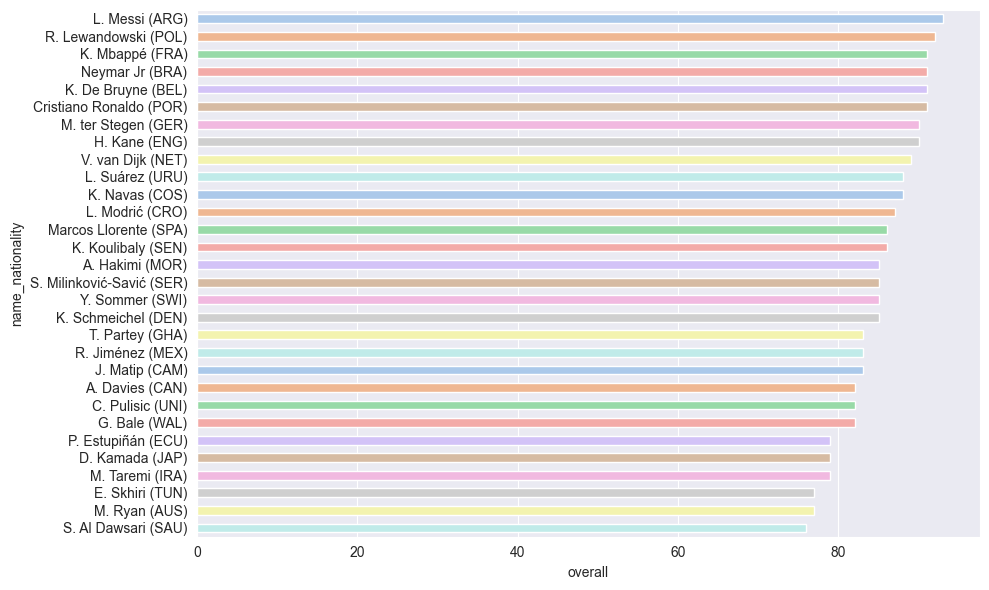

In [13]:
fig, ax = plt.subplots(figsize=(10, 6), tight_layout=True)

sns.barplot(df_best_players, x='overall', y='name_nationality',
            palette=sns.color_palette('pastel'), width=0.5)
plt.show()

In [14]:
def best_squad(nationality):
    df_best_squad = df.copy()
    df_best_squad = df_best_squad.groupby(['nationality_name', 'player_positions']).head(2)
    df_best_squad = df_best_squad[df_best_squad['nationality_name']==nationality].sort_values(['player_positions', 'overall', 'potential'], ascending=False)
    return df_best_squad

In [15]:
best_squad('Portugal')

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
8049,231014,https://sofifa.com/player/231014/asumah-abubak...,Asumah Abubakar,Asumah Abubakar-Ankrah,"ST, RW, LW",67,74,2100000.0,4000.0,24,...,48+2,48+2,48+2,52+2,14+2,https://cdn.sofifa.net/players/231/014/22_120.png,https://cdn.sofifa.net/teams/10032/60.png,https://cdn.sofifa.net/flags/ch.png,NaN,https://cdn.sofifa.net/flags/pt.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
2681,212267,https://sofifa.com/player/212267/ivan-ricardo-...,Ivan Cavaleiro,Ivan Ricardo Neves Abreu Cavaleiro,"ST, LM, RM",73,73,3300000.0,45000.0,27,...,52+2,52+2,52+2,57+2,18+2,https://cdn.sofifa.net/players/212/267/22_120.png,https://cdn.sofifa.net/teams/144/60.png,https://cdn.sofifa.net/flags/gb-eng.png,NaN,https://cdn.sofifa.net/flags/pt.png
2798,224538,https://sofifa.com/player/224538/pedro-nuno-fe...,Pedro Nuno,Pedro Nuno Fernandes Ferreira,"ST, LM, LW",73,76,4000000.0,8000.0,26,...,50+2,50+2,50+2,56+2,19+2,https://cdn.sofifa.net/players/224/538/22_120.png,https://cdn.sofifa.net/teams/1889/60.png,https://cdn.sofifa.net/flags/pt.png,NaN,https://cdn.sofifa.net/flags/pt.png
8226,238830,https://sofifa.com/player/238830/alexandre-gar...,Alexandre Guedes,Alexandre Xavier Pereira Guedes,"ST, CF",67,67,1100000.0,4000.0,27,...,39+2,39+2,39+2,41+2,18+2,https://cdn.sofifa.net/players/238/830/22_120.png,https://cdn.sofifa.net/teams/114326/60.png,https://cdn.sofifa.net/flags/pl.png,NaN,https://cdn.sofifa.net/flags/pt.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3670,235210,https://sofifa.com/player/235210/pedro-filipe-...,Pedrinho,Pedro Filipe Barbosa Moreira,"CAM, CM",72,72,2400000.0,9000.0,28,...,58+2,58+2,58+2,64+2,18+2,https://cdn.sofifa.net/players/235/210/22_120.png,https://cdn.sofifa.net/teams/1888/60.png,https://cdn.sofifa.net/flags/pt.png,NaN,https://cdn.sofifa.net/flags/pt.png
4090,211559,https://sofifa.com/player/211559/tiago-filipe-...,Tiago Rodrigues,Tiago Filipe Sousa Nóbrega Rodrigues,"CAM, CM",71,71,1800000.0,15000.0,29,...,57+2,57+2,57+2,62+2,17+2,https://cdn.sofifa.net/players/211/559/22_120.png,https://cdn.sofifa.net/teams/113222/60.png,https://cdn.sofifa.net/flags/sa.png,NaN,https://cdn.sofifa.net/flags/pt.png
7309,248811,https://sofifa.com/player/248811/bruno-miguel-...,Bruno Lourenço,Bruno Miguel Ponces Lourenço,"CAM, CF, ST",68,77,2700000.0,3000.0,23,...,53+2,53+2,53+2,57+2,14+2,https://cdn.sofifa.net/players/248/811/22_120.png,https://cdn.sofifa.net/teams/10020/60.png,https://cdn.sofifa.net/flags/pt.png,NaN,https://cdn.sofifa.net/flags/pt.png
28,212198,https://sofifa.com/player/212198/bruno-miguel-...,Bruno Fernandes,Bruno Miguel Borges Fernandes,CAM,88,89,107500000.0,250000.0,26,...,73+3,73+3,73+3,77+3,21+3,https://cdn.sofifa.net/players/212/198/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png


In [16]:
average_overall = [best_squad(team)['overall'].mean() for team in teams_worldcup]

df_average_overall = pd.DataFrame({'Teams': teams_worldcup, 'AVG_Overall': average_overall})
df_average_overall = df_average_overall.dropna()
df_average_overall = df_average_overall.sort_values('AVG_Overall', ascending=False)
df_average_overall

,Teams,AVG_Overall
6,Spain,73.711340
1,Brazil,73.673729
7,Portugal,72.925926
4,Argentina,71.739927
19,Morocco,71.260870
9,Netherlands,71.219858
15,Croatia,71.217391
20,Serbia,71.200000
3,France,71.019685
8,Mexico,70.308333


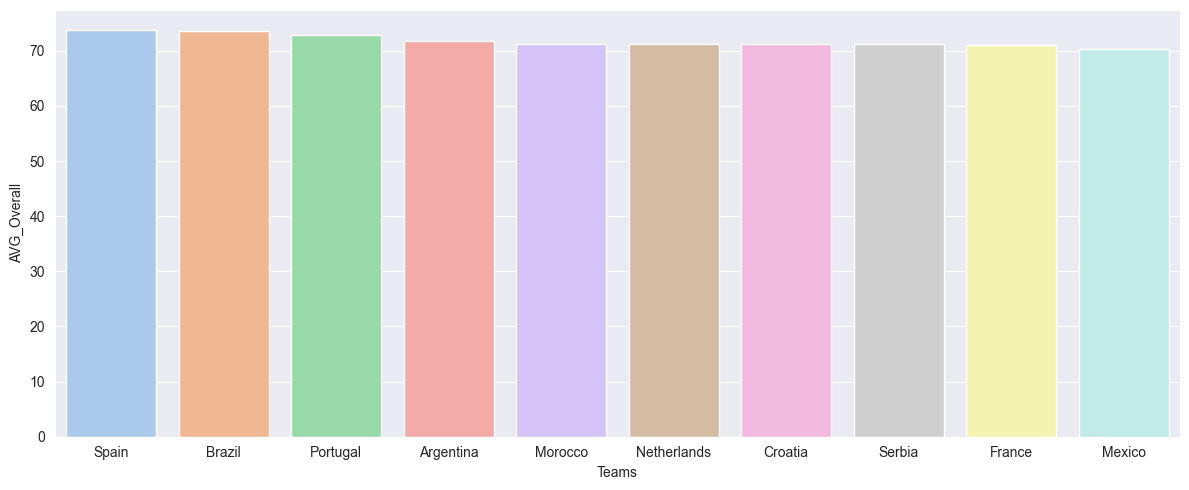

In [17]:
fig, ax = plt.subplots(figsize=(12, 5), tight_layout=True)

sns.barplot(df_average_overall[:10], x='Teams', y='AVG_Overall',
            palette=sns.color_palette('pastel'))
plt.show()

In [18]:
dict_formation = {
    '4-3-3': ['GK', 'RB', 'CB', 'CB', 'LB', 'CDM', 'CM', 'CAM', 'RW', 'ST', 'LW'],
    '4-4-2': ['GK', 'RB', 'CB', 'CB', 'LB', 'RM', 'CM', 'CM', 'LM', 'ST', 'ST'],
    '4-3-2-1': ['GK', 'RB', 'CB', 'CB', 'LB', 'CDM', 'CDM', 'CAM', 'CAM', 'CAM', 'ST'],
}

In [19]:
def best_lineup(nationality, lineup):
    lineup_count = [lineup.count(i) for i in lineup]

    df_lineup = pd.DataFrame({'position': lineup, 'count': lineup_count})
    positions_non_repeated = df_lineup[df_lineup['count'] <= 1]['position'].values
    positions_repeated = df_lineup[df_lineup['count'] > 1]['position'].values

    df_squad = best_squad(nationality)

    df_lineup = pd.concat([
        df_squad[df_squad['player_positions'].isin(positions_non_repeated)].drop_duplicates('player_positions', keep='first'),
        df_squad[df_squad['player_positions'].isin(positions_repeated)]]
    )
    return df_lineup[['short_name', 'overall', 'club_name', 'player_positions']]

In [20]:
for index, row in df_average_overall[:7].iterrows():
    max_average = None
    for key, values in dict_formation.items():
        average = best_lineup(row['Teams'], values)['overall'].mean()
        if max_average is None or average>max_average:
            max_average = average
            formation = key
    print(row['Teams'], formation, max_average)

Spain 4-3-3 83.0
Brazil 4-3-3 82.63636363636364
Portugal 4-3-3 79.3
Argentina 4-4-2 79.36363636363636
Morocco 4-4-2 76.5
Netherlands 4-4-2 78.9090909090909
Croatia 4-4-2 77.1


In [25]:
# Spain 4-2-3-1 85.1
# Portugal 4-2-3-1 84.9
# England 4-4-2 84.45454545454545
# Brazil 4-3-3 84.81818181818181
# France 4-2-3-1 83.9
# Argentina 4-3-3 83.54545454545455
# Germany 4-3-2-1 84.1

In [28]:
best_lineup('Argentina', dict_formation['4-3-2-1'])

,short_name,overall,club_name,player_positions
93,L. Martínez,85,Inter,ST
1301,J. Buffarini,76,SD Huesca,RB
242,N. Tagliafico,82,Ajax,LB
113,E. Martínez,84,Aston Villa,GK
3416,D. Musto,72,Club Atlético Peñarol,CDM
7377,D. Ayala,68,Estudiantes de La Plata,CDM
269,C. Romero,82,Tottenham Hotspur,CB
302,N. Otamendi,81,SL Benfica,CB
1303,L. Zelarayán,76,Columbus Crew,CAM
1158,D. Buonanotte,76,Universidad Católica,CAM


In [30]:
best_lineup('Portugal', dict_formation['4-3-2-1'])

,short_name,overall,club_name,player_positions
135,André Silva,84,RB Leipzig,ST
908,André Almeida,77,SL Benfica,RB
733,Mário Rui,78,Napoli,LB
226,A. Lopes,82,Olympique Lyonnais,GK
7461,Filipe Cardoso,68,Clube Sport Marítimo,CDM
13369,Tiago Matos,63,Radomiak Radom,CDM
46,Rúben Dias,87,Manchester City,CB
199,Pepe,82,FC Porto,CB
28,Bruno Fernandes,88,Manchester United,CAM
2384,Chiquinho,74,SC Braga,CAM


In [32]:
best_lineup('Germany', dict_formation['4-3-2-1'])

,short_name,overall,club_name,player_positions
1245,N. Füllkrug,76,SV Werder Bremen,ST
3503,M. Busch,72,1. FC Heidenheim 1846,RB
450,P. Max,80,PSV,LB
8,M. ter Stegen,90,FC Barcelona,GK
565,C. Kramer,79,Borussia Mönchengladbach,CDM
3749,A. Fein,72,SpVgg Greuther Fürth,CDM
49,M. Hummels,86,Borussia Dortmund,CB
119,M. Ginter,84,Borussia Mönchengladbach,CB
3934,M. Stiepermann,71,SC Paderborn 07,CAM
12201,O. Wähling,64,VfL Osnabrück,CAM
